In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.shape

(96453, 12)

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df['Precip Type'].head(10)

0    rain
1    rain
2    rain
3    rain
4    rain
5    rain
6    rain
7    rain
8    rain
9    rain
Name: Precip Type, dtype: object

In [7]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [8]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [71]:
df['Precip Type'].fillna(method='ffill',inplace=True)

In [10]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [72]:
Year = []
Month = []
Other = []
for i in df['Formatted Date']:
    value = i.split('-')
    Year.append(value[0])
    Month.append(value[1])
    Other.append(value[-1])
df['Year'] = Year
df['Month'] = Month
# df['Other'] = Other
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,04
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,04
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,04
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,04
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,04


In [14]:
df.sample(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month
56690,2012-07-26 02:00:00.000 +0200,Mostly Cloudy,rain,19.400000,19.400000,0.94,5.1037,138.0,7.1645,0.0,1014.67,Mostly cloudy throughout the day.,2012,07
3557,2006-01-07 05:00:00.000 +0100,Foggy,rain,1.083333,1.083333,0.92,4.0089,145.0,0.2898,0.0,1027.15,Foggy starting overnight continuing until morn...,2006,01
41487,2010-05-30 16:00:00.000 +0200,Partly Cloudy,rain,22.672222,22.672222,0.71,15.0374,150.0,11.2700,0.0,1009.38,Partly cloudy throughout the day.,2010,05
80068,2015-08-26 07:00:00.000 +0200,Mostly Cloudy,rain,17.733333,17.733333,0.78,9.3219,281.0,10.2557,0.0,1019.83,Partly cloudy throughout the day.,2015,08
5861,2006-05-10 06:00:00.000 +0200,Partly Cloudy,rain,9.977778,9.977778,0.93,0.2576,290.0,9.8049,0.0,1010.35,Partly cloudy starting overnight.,2006,05
72873,2014-02-03 09:00:00.000 +0100,Clear,snow,-0.250000,-3.816667,0.76,10.8675,80.0,7.9051,0.0,1025.61,Partly cloudy until morning.,2014,02
40040,2010-06-04 08:00:00.000 +0200,Overcast,rain,14.838889,14.838889,0.94,14.9247,223.0,10.0625,0.0,1010.51,Foggy starting in the evening continuing until...,2010,06
76067,2014-05-12 15:00:00.000 +0200,Partly Cloudy,rain,17.777778,17.777778,0.40,17.6295,300.0,10.2557,0.0,1013.69,Mostly cloudy throughout the day.,2014,05
12921,2007-07-29 09:00:00.000 +0200,Mostly Cloudy,rain,24.794444,24.794444,0.55,20.6885,329.0,9.9820,0.0,1014.65,Mostly cloudy throughout the day.,2007,07
86043,2015-11-30 07:00:00.000 +0100,Mostly Cloudy,rain,4.177778,2.022222,0.87,8.6135,201.0,8.6457,0.0,1019.65,Mostly cloudy throughout the day.,2015,11


In [18]:
df.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [19]:
df['Loud Cover'].nunique()

1

In [ ]:
# Loud Cover attribute has only one unique value, it doesn't infer any information

In [20]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Year', 'Month'],
      dtype='object')

In [21]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
Year                         object
Month                        object
dtype: object

In [22]:
df['Daily Summary'].nunique()

214

In [24]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [ ]:
# 1. Precip type
# 2. Summary
# 3. Daily Summary


In [76]:
df.Year = df.Year.astype('int')

In [77]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
Year                          int32
Month                         int32
dtype: object

In [74]:
df.Month = df.Month.astype('int')

In [78]:
df['Summary'].nunique()

27

In [79]:
df = pd.get_dummies(data = df, columns=['Precip Type', 'Summary'], drop_first=True)

In [80]:
df.shape

(96453, 39)

In [81]:
df.dtypes

Formatted Date                                  object
Temperature (C)                                float64
Apparent Temperature (C)                       float64
Humidity                                       float64
Wind Speed (km/h)                              float64
Wind Bearing (degrees)                         float64
Visibility (km)                                float64
Loud Cover                                     float64
Pressure (millibars)                           float64
Daily Summary                                   object
Year                                             int32
Month                                            int32
Precip Type_snow                                 uint8
Summary_Breezy and Dry                           uint8
Summary_Breezy and Foggy                         uint8
Summary_Breezy and Mostly Cloudy                 uint8
Summary_Breezy and Overcast                      uint8
Summary_Breezy and Partly Cloudy                 uint8
Summary_Cl

<AxesSubplot:>

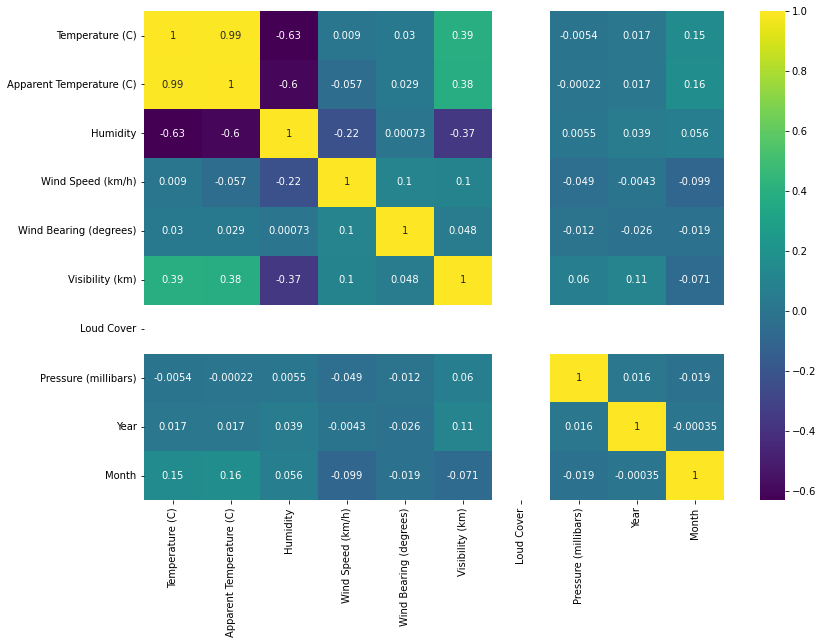

In [34]:
# plt.figure(figsize=(13,9))
# sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn import metrics

In [92]:
df.dtypes

Formatted Date                                  object
Temperature (C)                                float64
Apparent Temperature (C)                       float64
Humidity                                       float64
Wind Speed (km/h)                              float64
Wind Bearing (degrees)                         float64
Visibility (km)                                float64
Loud Cover                                     float64
Pressure (millibars)                           float64
Daily Summary                                   object
Year                                             int32
Month                                            int32
Precip Type_snow                                 uint8
Summary_Breezy and Dry                           uint8
Summary_Breezy and Foggy                         uint8
Summary_Breezy and Mostly Cloudy                 uint8
Summary_Breezy and Overcast                      uint8
Summary_Breezy and Partly Cloudy                 uint8
Summary_Cl

In [104]:
x = df.drop(columns=['Formatted Date', 'Loud Cover','Apparent Temperature (C)', 'Daily Summary'], axis = 1)
y = df['Apparent Temperature (C)']

In [105]:
model = LinearRegression()

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.30, random_state = 1)

In [107]:
model.fit(x_train, y_train)

LinearRegression()

In [108]:
model.score(x_train, y_train)

0.9901521055249413

In [109]:
model.score(x_test, y_test)

0.9901141986647156

In [110]:
y_pred = model.predict(x_test)

In [111]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse


1.0648499839876613